In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up the quantum device
dev = qml.device("default.qubit", wires=1, shots=102400)

In [4]:
# Define the quantum circuit to get the statevector
@qml.qnode(dev)
def hadamard_measure():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0))  # computational basis measurement

In [5]:
# Run the circuit
samples = hadamard_measure()

In [6]:
# Convert samples (±1 from PauliZ) into bits (0/1)
bits = (1 - samples) // 2

In [7]:
# Count results
unique, counts = np.unique(bits, return_counts=True)
result_counts = dict(zip(unique.astype(str), counts))
print(result_counts)

{'0.0': 51104, '1.0': 51296}


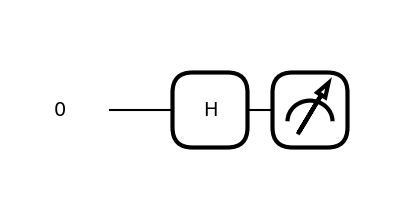

In [8]:
# Draw the circuit
qml.draw_mpl(hadamard_measure)()
plt.show()

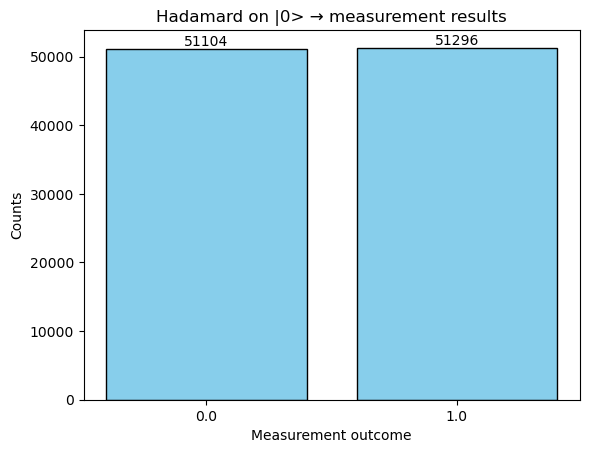

In [12]:
# --- Plot histogram ---
fig, ax = plt.subplots()
bars = ax.bar(result_counts.keys(), result_counts.values(),
              color="skyblue", edgecolor="black")
# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f"{height}", ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Measurement outcome")
ax.set_ylabel("Counts")
ax.set_title("Hadamard on |0> → measurement results")
plt.show()